# Singular Spectrum Analysis (SSA)

In [1]:
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import glob
import itertools
from skmultiflow.data.data_stream import DataStream
from skmultiflow.meta import AdaptiveRandomForestClassifier, StreamingRandomPatchesClassifier,\
OnlineBoostingClassifier, OnlineSMOTEBaggingClassifier
from skmultiflow.evaluation import EvaluatePrequential
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score,accuracy_score,roc_auc_score,confusion_matrix
%matplotlib notebook

In [38]:
file_paths = '..//preprocessed_data/Sebastian/Preprocessed_without_anchor/binary/'
filenames = glob.glob(file_paths+"*[0-9].csv",recursive = True)
list_of_dfs = [pd.read_csv(filename,sep=';',header=0) for filename in filenames]
data_all = pd.DataFrame()
for dataframe, filename in zip(list_of_dfs, filenames):
    data_all=data_all.append(dataframe.iloc[:,-5:])
data=pd.DataFrame(data_all)
data.reset_index(drop=True,inplace=True)
len(data)


In [39]:
file_paths = '..//data/processed/'
filenames = glob.glob(file_paths+"*[0-9].csv",recursive = True)
list_of_dfs = [pd.read_csv(filename,sep=';',header=0) for filename in filenames]
data_t_all = pd.DataFrame()
for dataframe, filename in zip(list_of_dfs, filenames):
    data_t_all=data_t_all.append(dataframe.iloc[:,-5:])
data_t=pd.DataFrame(data_t_all)
data_t.reset_index(drop=True,inplace=True)
len(data_t)

61300

In [126]:
X = data.iloc[:,:4].transpose()
X_test = data_t.iloc[:,:4].transpose()
groups = [np.arange(i, i + 4) for i in range(0, 11, 4)]
ssa = SingularSpectrumAnalysis(window_size=15, groups=groups)
ssa.fit(X)
X_ssa = ssa.transform(X)
X_ssa_test=ssa.transform(X_test)

<IPython.core.display.Javascript object>


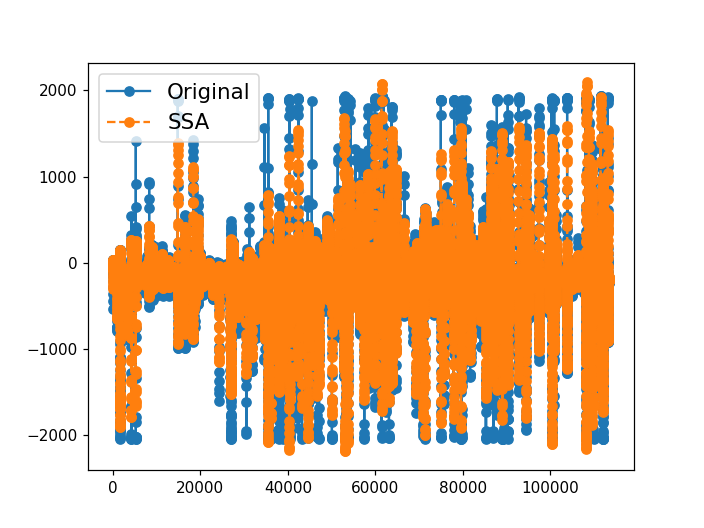

In [107]:
# Show the results for the first time series
plt.figure()
plt.plot(X.iloc[0,:], 'o-', label='Original')
plt.plot(X_ssa[0], 'o--', label='SSA')
plt.legend(loc='best', fontsize=14)
plt.show()

In [130]:
X_ssa.shape


(4, 3, 113349)

<IPython.core.display.Javascript object>


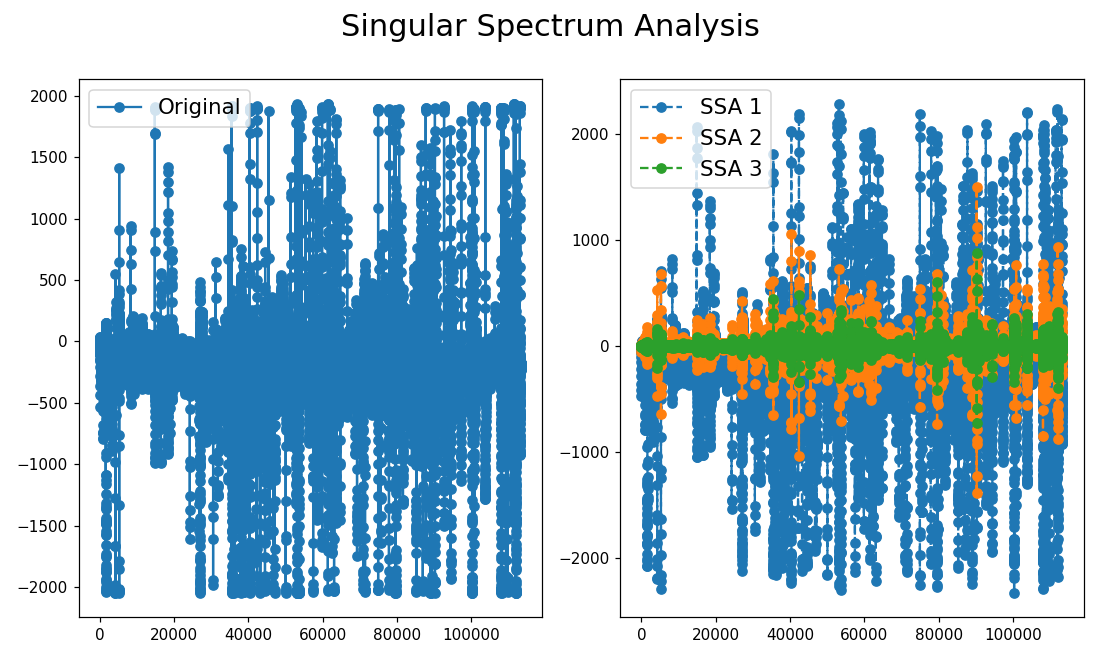

In [132]:
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(121)
ax1.plot(X.iloc[0,:], 'o-', label='Original')
ax1.legend(loc='best', fontsize=14)

ax2 = plt.subplot(122)
for i in range(len(groups)):
    ax2.plot(X_ssa[0, i], 'o--', label='SSA {0}'.format(i + 1))
ax2.legend(loc='best', fontsize=14)

plt.suptitle('Singular Spectrum Analysis', fontsize=20)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


# FastICA Independent component analysis (ICA)

In [195]:
# Compute ICA
from sklearn.decomposition import FastICA
ica = FastICA(n_components=4)
S_ = ica.fit_transform(X.transpose())  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

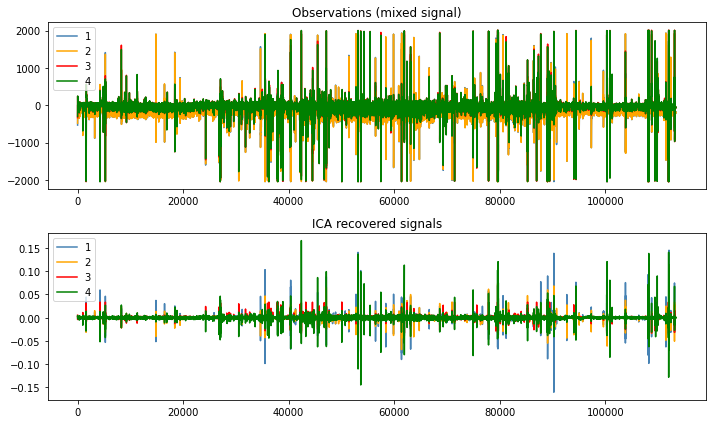

In [196]:
models = [np.asarray(X.transpose()),  S_, ]
names = ['Observations (mixed signal)',
         'ICA recovered signals']
colors = ['steelblue', 'orange','red','green']
labels = ['1','2','3','4']
plt.figure(figsize=(10, 6))
for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(2, 1, ii)
    plt.title(name)
    for sig, color,label in zip(model.T, colors, labels):
        plt.plot(sig, color=color,label =label)
        plt.legend()
plt.tight_layout()
plt.show()